# Amazon Sales Dashboard - Data Cleaning
## Amazon Sales Report Dataset

This notebook performs data cleaning and wrangling on the Amazon Sales Report dataset.

### Import Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Load Raw Data

In [28]:
# Load the Amazon Sales Report dataset
df = pd.read_csv('../data/raw/Amazon_Sales_Report.csv', low_memory=False)
print(f"Original dataset shape: {df.shape}")
df.head(10)

Original dataset shape: (128975, 24)


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
5,5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,...,INR,824.00,GHAZIABAD,UTTAR PRADESH,201102.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
6,6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,...,INR,653.00,CHANDIGARH,CHANDIGARH,160036.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,...,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
8,8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,...,NaN,NaN,HYDERABAD,TELANGANA,500008.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
9,9,402-4393761-0311520,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3461,JNE3461-KR-XXL,kurta,...,INR,363.00,Chennai,TAMIL NADU,600041.0,IN,NaN,False,NaN,NaN


### Initial Data Exploration

In [29]:
# Display basic information
print("Dataset Info:")
df.info()
print("\n" + "="*50)
print("\nBasic Statistics:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [30]:
# Check for missing values
print("Missing Values:")
missing = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Missing_Count': missing, 'Percentage': missing_percent})
print(missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False))

Missing Values:
                  Missing_Count  Percentage
fulfilled-by              89698   69.546811
promotion-ids             49153   38.110487
Unnamed: 22               49050   38.030626
currency                   7795    6.043807
Amount                     7795    6.043807
Courier Status             6872    5.328164
ship-city                    33    0.025586
ship-state                   33    0.025586
ship-postal-code             33    0.025586
ship-country                 33    0.025586


In [31]:
# Check for duplicates
print(f"Total duplicate rows: {df.duplicated().sum()}")
print(f"Duplicate Order ID values: {df['Order ID'].duplicated().sum()}")

Total duplicate rows: 0
Duplicate Order ID values: 8597


---
## Data Cleaning Steps

### Step 1: Delete Redundant Columns

In [32]:
# Check for redundant columns
print("Original columns:")
print(list(df.columns))
print(f"\nTotal columns: {len(df.columns)}")

# Identify columns to drop (unnamed, redundant, or not useful)
columns_to_drop = []
for col in df.columns:
    if 'Unnamed' in str(col):
        columns_to_drop.append(col)
    elif df[col].isnull().sum() == len(df):  # Completely empty columns
        columns_to_drop.append(col)

if columns_to_drop:
    df = df.drop(columns=columns_to_drop)
    print(f"\nDropped columns: {columns_to_drop}")
else:
    print("\nNo redundant columns to drop.")

print(f"\nColumns after cleanup: {len(df.columns)}")

Original columns:
['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids', 'B2B', 'fulfilled-by', 'Unnamed: 22']

Total columns: 24

Dropped columns: ['Unnamed: 22']

Columns after cleanup: 23


### Step 2: Drop / Rename the Columns

In [33]:
# Rename columns for consistency (snake_case)
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('-', '_')
print("Renamed columns:")
print(list(df.columns))

Renamed columns:
['index', 'order_id', 'date', 'status', 'fulfilment', 'sales_channel_', 'ship_service_level', 'style', 'sku', 'category', 'size', 'asin', 'courier_status', 'qty', 'currency', 'amount', 'ship_city', 'ship_state', 'ship_postal_code', 'ship_country', 'promotion_ids', 'b2b', 'fulfilled_by']


### Step 3: Remove Duplicates

In [34]:
# Remove duplicate rows
print(f"Rows before removing duplicates: {len(df)}")
initial_rows = len(df)
df = df.drop_duplicates()
print(f"Rows after removing duplicates: {len(df)}")
print(f"Duplicates removed: {initial_rows - len(df)}")

Rows before removing duplicates: 128975
Rows after removing duplicates: 128975
Duplicates removed: 0


### Step 4: Remove the NaN Values from the Dataset

In [35]:
# Check missing values before cleaning
print("Missing values before cleaning:")
print(df.isnull().sum()[df.isnull().sum() > 0])
print(f"\nTotal rows: {len(df)}")

Missing values before cleaning:
courier_status       6872
currency             7795
amount               7795
ship_city              33
ship_state             33
ship_postal_code       33
ship_country           33
promotion_ids       49153
fulfilled_by        89698
dtype: int64

Total rows: 128975


In [36]:
# Remove rows where critical columns are missing
# Critical columns: order_id, date
critical_cols = ['order_id', 'date']
df = df.dropna(subset=critical_cols)
print(f"Rows after removing missing critical fields: {len(df)}")

Rows after removing missing critical fields: 128975


In [37]:
# Fill missing values for non-critical columns
# Fill missing courier_status with 'Unknown'
if 'courier_status' in df.columns:
    df['courier_status'] = df['courier_status'].fillna('Unknown')

# Fill missing ship_postal_code with 0
if 'ship_postal_code' in df.columns:
    df['ship_postal_code'] = df['ship_postal_code'].fillna(0)

# Fill missing promotion_ids with 'None'
if 'promotion_ids' in df.columns:
    df['promotion_ids'] = df['promotion_ids'].fillna('None')

# Fill missing Amount and currency for cancelled orders
df['amount'] = df['amount'].fillna(0)
df['currency'] = df['currency'].fillna('INR')

print("\nMissing values after cleaning:")
print(df.isnull().sum()[df.isnull().sum() > 0])


Missing values after cleaning:
ship_city          33
ship_state         33
ship_country       33
fulfilled_by    89698
dtype: int64


### Step 5: Clean Individual Columns

#### 5.1 Clean Order ID Column

In [38]:
# Check Order ID format
print("Sample Order ID values:")
print(df['order_id'].head(10))
print(f"\nUnique orders: {df['order_id'].nunique()}")
print(f"Total rows: {len(df)}")

Sample Order ID values:
0    405-8078784-5731545
1    171-9198151-1101146
2    404-0687676-7273146
3    403-9615377-8133951
4    407-1069790-7240320
5    404-1490984-4578765
6    408-5748499-6859555
7    406-7807733-3785945
8    407-5443024-5233168
9    402-4393761-0311520
Name: order_id, dtype: object

Unique orders: 120378
Total rows: 128975


In [39]:
# Remove any whitespace from Order ID
df['order_id'] = df['order_id'].astype(str).str.strip()
print("Order ID cleaned (whitespace removed)")

Order ID cleaned (whitespace removed)


#### 5.2 Clean Date Column

In [40]:
# Convert Date to datetime
df['date'] = df['date'].astype(str).str.strip()
df['date'] = pd.to_datetime(df['date'], errors='coerce', format='%m-%d-%y')
print("Date converted to datetime format")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"Invalid dates (NaT): {df['date'].isnull().sum()}")

Date converted to datetime format
Date range: 2022-03-31 00:00:00 to 2022-06-29 00:00:00
Invalid dates (NaT): 0


In [41]:
# Remove rows with invalid dates (NaT values)
rows_before = len(df)
df = df.dropna(subset=['date'])
rows_after = len(df)
print(f"Removed {rows_before - rows_after} rows with invalid dates")
print(f"Rows remaining: {rows_after}")

Removed 0 rows with invalid dates
Rows remaining: 128975


In [42]:
# Extract additional date features
df['order_year'] = df['date'].dt.year
df['order_month'] = df['date'].dt.month
df['order_quarter'] = df['date'].dt.quarter
df['order_day_of_week'] = df['date'].dt.dayofweek
df['order_month_name'] = df['date'].dt.strftime('%B')
df['order_day_name'] = df['date'].dt.strftime('%A')
print("\nExtracted date features: order_year, order_month, order_quarter, order_day_of_week, order_month_name, order_day_name")


Extracted date features: order_year, order_month, order_quarter, order_day_of_week, order_month_name, order_day_name


#### 5.3 Clean Status Column

In [43]:
# Check Status values
print("Status value counts:")
print(df['status'].value_counts())

Status value counts:
status
Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64


In [44]:
# Standardize Status values (remove extra spaces, capitalize)
df['status'] = df['status'].astype(str).str.strip().str.title()
print("\nStatus values after standardization:")
print(df['status'].value_counts())


Status values after standardization:
status
Shipped                          77804
Shipped - Delivered To Buyer     28769
Cancelled                        18332
Shipped - Returned To Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting For Pick Up      281
Shipped - Returning To Seller      145
Shipped - Out For Delivery          35
Shipped - Rejected By Buyer         11
Shipping                             8
Shipped - Lost In Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64


#### 5.4 Clean Amount and Quantity Columns

In [45]:
# Check Amount and Quantity statistics
print("Amount statistics:")
print(df['amount'].describe())
print("\nQuantity statistics:")
print(df['qty'].describe())
print(f"\nNegative Amount: {(df['amount'] < 0).sum()}")
print(f"Negative Quantity: {(df['qty'] < 0).sum()}")

Amount statistics:
count    128975.000000
mean        609.363662
std         313.347147
min           0.000000
25%         413.000000
50%         583.000000
75%         771.000000
max        5584.000000
Name: amount, dtype: float64

Quantity statistics:
count    128975.000000
mean          0.904431
std           0.313354
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          15.000000
Name: qty, dtype: float64

Negative Amount: 0
Negative Quantity: 0


In [46]:
# Remove rows with negative amounts or quantities
df = df[(df['amount'] >= 0) & (df['qty'] >= 0)]
print(f"Rows after removing negative values: {len(df)}")

Rows after removing negative values: 128975


#### 5.5 Clean Categorical Columns

In [47]:
# Standardize categorical columns
categorical_cols = ['fulfilment', 'sales_channel', 'ship_service_level', 'category', 
                   'size', 'courier_status', 'ship_city', 'ship_state', 'ship_country', 'style', 'sku']

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.title()
        
print("Standardized categorical columns")

Standardized categorical columns


In [48]:
# Clean B2B column
print("B2B value counts:")
print(df['b2b'].value_counts())

# Convert to boolean
df['b2b'] = df['b2b'].astype(str).str.lower().map({'true': True, 'false': False, 'nan': False})
df['b2b'] = df['b2b'].fillna(False)
print("\nB2B converted to boolean")

B2B value counts:
b2b
False    128104
True        871
Name: count, dtype: int64

B2B converted to boolean


### Step 6: Check for Some More Transformations

#### 6.1 Create Calculated Columns

In [49]:
# Calculate unit price (amount / quantity)
df['unit_price'] = np.where(df['qty'] > 0, df['amount'] / df['qty'], 0)
print("Created 'unit_price' column")
print(f"\nUnit price statistics:")
print(df['unit_price'].describe())

Created 'unit_price' column

Unit price statistics:
count    128975.000000
mean        582.597612
std         328.055021
min           0.000000
25%         399.000000
50%         568.000000
75%         771.000000
max        2598.000000
Name: unit_price, dtype: float64


In [50]:
# Create order status categories
def categorize_status(status):
    status = str(status).lower()
    if 'cancelled' in status:
        return 'Cancelled'
    elif 'shipped' in status or 'delivered' in status:
        return 'Completed'
    elif 'pending' in status:
        return 'Pending'
    else:
        return 'Other'

df['order_status_category'] = df['status'].apply(categorize_status)
print("Created 'order_status_category' feature")
print("\nOrder status category distribution:")
print(df['order_status_category'].value_counts())

Created 'order_status_category' feature

Order status category distribution:
order_status_category
Completed    109696
Cancelled     18332
Pending         939
Other             8
Name: count, dtype: int64


In [51]:
# Create binary flags for order status
df['is_cancelled'] = (df['order_status_category'] == 'Cancelled').astype(int)
df['is_completed'] = (df['order_status_category'] == 'Completed').astype(int)
df['is_b2b'] = df['b2b'].astype(int)

print("Created binary flags: is_cancelled, is_completed, is_b2b")
print(f"\nCancelled orders: {df['is_cancelled'].sum()}")
print(f"Completed orders: {df['is_completed'].sum()}")
print(f"B2B orders: {df['is_b2b'].sum()}")

Created binary flags: is_cancelled, is_completed, is_b2b

Cancelled orders: 18332
Completed orders: 109696
B2B orders: 871


In [52]:
# Create fulfilment type flags
df['is_amazon_fulfilled'] = (df['fulfilment'].str.lower() == 'amazon').astype(int)
df['is_merchant_fulfilled'] = (df['fulfilment'].str.lower() == 'merchant').astype(int)

print("Created fulfilment flags: is_amazon_fulfilled, is_merchant_fulfilled")
print(f"\nAmazon fulfilled: {df['is_amazon_fulfilled'].sum()}")
print(f"Merchant fulfilled: {df['is_merchant_fulfilled'].sum()}")

Created fulfilment flags: is_amazon_fulfilled, is_merchant_fulfilled

Amazon fulfilled: 89698
Merchant fulfilled: 39277


In [53]:
# Create size categories
def categorize_size(size):
    size = str(size).upper().strip()
    if size in ['XS', 'S']:
        return 'Small'
    elif size in ['M', 'L']:
        return 'Medium'
    elif size in ['XL', 'XXL']:
        return 'Large'
    elif 'XXX' in size or '3XL' in size or '4XL' in size or '5XL' in size or '6XL' in size:
        return 'Extra Large'
    else:
        return 'Other'

df['size_category'] = df['size'].apply(categorize_size)
print("Created 'size_category' feature")
print("\nSize category distribution:")
print(df['size_category'].value_counts())

Created 'size_category' feature

Size category distribution:
size_category
Medium         44843
Large          38972
Small          28251
Extra Large    16531
Other            378
Name: count, dtype: int64


In [54]:
# Create promotion flag
df['has_promotion'] = (df['promotion_ids'] != 'None').astype(int)
print("Created 'has_promotion' flag")
print(f"\nOrders with promotions: {df['has_promotion'].sum()}")
print(f"Orders without promotions: {(df['has_promotion'] == 0).sum()}")

Created 'has_promotion' flag

Orders with promotions: 79822
Orders without promotions: 49153


#### 6.2 Create Aggregated Features

In [55]:
# Calculate orders per location (city-state combination)
city_state_orders = df.groupby(['ship_city', 'ship_state']).size().reset_index(name='orders_from_location')
df = df.merge(city_state_orders, on=['ship_city', 'ship_state'], how='left')
print("Created 'orders_from_location' feature")

Created 'orders_from_location' feature


In [56]:
# Calculate total sales by category
category_sales = df.groupby('category')['amount'].agg(['sum', 'mean', 'count']).reset_index()
category_sales.columns = ['category', 'category_total_sales', 'category_avg_sales', 'category_order_count']
df = df.merge(category_sales, on='category', how='left')
print("Created category-level aggregations: category_total_sales, category_avg_sales, category_order_count")

Created category-level aggregations: category_total_sales, category_avg_sales, category_order_count


In [57]:
# Calculate total sales by state
state_sales = df.groupby('ship_state')['amount'].agg(['sum', 'mean', 'count']).reset_index()
state_sales.columns = ['ship_state', 'state_total_sales', 'state_avg_sales', 'state_order_count']
df = df.merge(state_sales, on='ship_state', how='left')
print("Created state-level aggregations: state_total_sales, state_avg_sales, state_order_count")

Created state-level aggregations: state_total_sales, state_avg_sales, state_order_count


In [58]:
# Calculate sales vs category average
df['amount_vs_category_avg'] = ((df['amount'] - df['category_avg_sales']) / df['category_avg_sales'] * 100).round(2)
print("Created 'amount_vs_category_avg' feature")

Created 'amount_vs_category_avg' feature


#### 6.3 Create Time-Based Features

In [59]:
# Create season feature
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['order_season'] = df['order_month'].apply(get_season)
print("Created 'order_season' feature")
print("\nSeason distribution:")
print(df['order_season'].value_counts())

Created 'order_season' feature

Season distribution:
order_season
Spring    91278
Summer    37697
Name: count, dtype: int64


In [60]:
# Create weekend flag
df['is_weekend'] = (df['order_day_of_week'] >= 5).astype(int)
print("Created 'is_weekend' flag")
print(f"\nWeekend orders: {df['is_weekend'].sum()}")
print(f"Weekday orders: {(df['is_weekend'] == 0).sum()}")

Created 'is_weekend' flag

Weekend orders: 38143
Weekday orders: 90832


#### 6.4 Identify Outliers

In [61]:
# Check for amount outliers using IQR method
def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

print("Outliers in Amount:")
outliers_amount = find_outliers(df[df['amount'] > 0]['amount'])
print(f"Number of outliers: {len(outliers_amount)}")
print(f"Percentage: {len(outliers_amount)/len(df)*100:.2f}%")

Outliers in Amount:
Number of outliers: 3743
Percentage: 2.90%


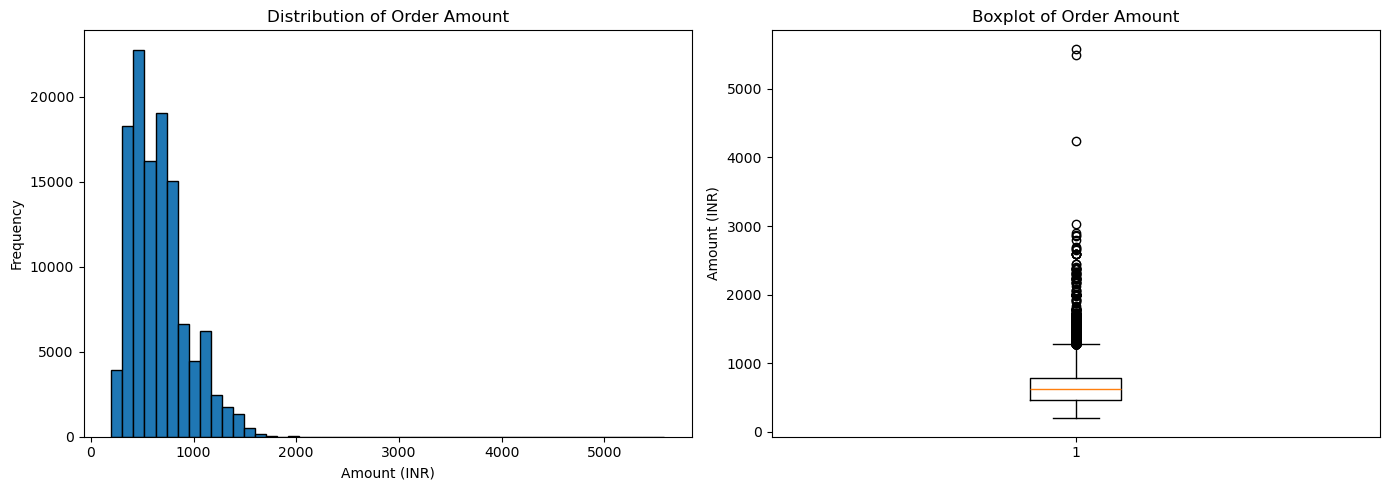

In [62]:
# Visualize amount distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df[df['amount'] > 0]['amount'], bins=50, edgecolor='black')
axes[0].set_title('Distribution of Order Amount')
axes[0].set_xlabel('Amount (INR)')
axes[0].set_ylabel('Frequency')

axes[1].boxplot(df[df['amount'] > 0]['amount'])
axes[1].set_title('Boxplot of Order Amount')
axes[1].set_ylabel('Amount (INR)')

plt.tight_layout()
plt.show()

#### 6.5 Sort Data

In [63]:
# Sort by Date and Order ID
df = df.sort_values(['date', 'order_id']).reset_index(drop=True)
print("Data sorted by Date and Order ID")
df.head(10)

Data sorted by Date and Order ID


,index,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku,category,...,orders_from_location,category_total_sales,category_avg_sales,category_order_count,state_total_sales,state_avg_sales,state_order_count,amount_vs_category_avg,order_season,is_weekend
0,49022,171-0068078-2649972,2022-03-31,Cancelled,Merchant,Amazon.in,Standard,Jne3798,Jne3798-Kr-L,Western Dress,...,11,11216072.69,723.617593,15500,456932.74,650.901339,702,0.16,Spring,0
1,48912,171-1229566-7854712,2022-03-31,Cancelled,Amazon,Amazon.in,Expedited,Set184,Set184-Kr-Pp-Xxl,Set,...,9092,39204124.03,779.654046,50284,6916615.65,610.469166,11330,-100.00,Spring,0
2,49006,171-1556000-8993931,2022-03-31,Cancelled,Amazon,Amazon.in,Expedited,Set282,Set282-Kr-Pp-Xxxl,Set,...,2844,39204124.03,779.654046,50284,3507880.44,588.274432,5963,-100.00,Spring,0
3,48981,171-2453326-6313144,2022-03-31,Shipped - Delivered To Buyer,Merchant,Amazon.in,Standard,Set183,Set183-Kr-Dh-M,Set,...,4617,39204124.03,779.654046,50284,13335534.14,599.080599,22260,-6.37,Spring,0
4,49046,171-2752302-3297130,2022-03-31,Shipped,Amazon,Amazon.in,Expedited,Set187,Set187-Kr-Dh-M,Set,...,482,39204124.03,779.654046,50284,919088.21,631.241902,1456,-23.17,Spring,0
5,49037,171-3292391-2933941,2022-03-31,Shipped,Amazon,Amazon.in,Expedited,Set182,Set182-Kr-Dh-Xxl,Set,...,9092,39204124.03,779.654046,50284,6916615.65,610.469166,11330,-23.17,Spring,0
6,48999,171-3572716-7638764,2022-03-31,Shipped - Delivered To Buyer,Merchant,Amazon.in,Standard,Jne3407,Jne3407-Kr-Xxl,Kurta,...,1,21299546.70,427.041456,49877,3830227.58,581.659465,6585,-41.93,Spring,0
7,49038,171-4509701-7509953,2022-03-31,Shipped,Amazon,Amazon.in,Expedited,Set361,Set361-Kr-Np-S,Set,...,633,39204124.03,779.654046,50284,974143.55,627.265647,1553,45.96,Spring,0
8,49017,171-5753986-2389965,2022-03-31,Shipped,Amazon,Amazon.in,Expedited,Jne3633,Jne3633-Kr-Xs,Kurta,...,6284,21299546.70,427.041456,49877,6515650.11,567.417061,11483,6.08,Spring,0
9,48943,171-5775429-9329962,2022-03-31,Shipped,Amazon,Amazon.in,Expedited,Jne3160,Jne3160-Kr-G-L,Kurta,...,171,21299546.70,427.041456,49877,6515650.11,567.417061,11483,40.27,Spring,0


#### 6.6 Final Data Quality Check

In [64]:
# Final data quality summary
print("=" * 60)
print("FINAL DATA QUALITY SUMMARY")
print("=" * 60)
print(f"\nFinal dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nMissing values:")
print(df.isnull().sum()[df.isnull().sum() > 0])
print(f"\nDuplicate rows: {df.duplicated().sum()}")
print(f"\nData types:")
print(df.dtypes)

FINAL DATA QUALITY SUMMARY

Final dataset shape: (128975, 48)

Columns: ['index', 'order_id', 'date', 'status', 'fulfilment', 'sales_channel_', 'ship_service_level', 'style', 'sku', 'category', 'size', 'asin', 'courier_status', 'qty', 'currency', 'amount', 'ship_city', 'ship_state', 'ship_postal_code', 'ship_country', 'promotion_ids', 'b2b', 'fulfilled_by', 'order_year', 'order_month', 'order_quarter', 'order_day_of_week', 'order_month_name', 'order_day_name', 'unit_price', 'order_status_category', 'is_cancelled', 'is_completed', 'is_b2b', 'is_amazon_fulfilled', 'is_merchant_fulfilled', 'size_category', 'has_promotion', 'orders_from_location', 'category_total_sales', 'category_avg_sales', 'category_order_count', 'state_total_sales', 'state_avg_sales', 'state_order_count', 'amount_vs_category_avg', 'order_season', 'is_weekend']

Missing values:
fulfilled_by    89698
dtype: int64

Duplicate rows: 0

Data types:
index                              int64
order_id                          ob

In [65]:
# Display cleaned data sample
print("\nCleaned data sample:")
df.head(10)


Cleaned data sample:


,index,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku,category,...,orders_from_location,category_total_sales,category_avg_sales,category_order_count,state_total_sales,state_avg_sales,state_order_count,amount_vs_category_avg,order_season,is_weekend
0,49022,171-0068078-2649972,2022-03-31,Cancelled,Merchant,Amazon.in,Standard,Jne3798,Jne3798-Kr-L,Western Dress,...,11,11216072.69,723.617593,15500,456932.74,650.901339,702,0.16,Spring,0
1,48912,171-1229566-7854712,2022-03-31,Cancelled,Amazon,Amazon.in,Expedited,Set184,Set184-Kr-Pp-Xxl,Set,...,9092,39204124.03,779.654046,50284,6916615.65,610.469166,11330,-100.00,Spring,0
2,49006,171-1556000-8993931,2022-03-31,Cancelled,Amazon,Amazon.in,Expedited,Set282,Set282-Kr-Pp-Xxxl,Set,...,2844,39204124.03,779.654046,50284,3507880.44,588.274432,5963,-100.00,Spring,0
3,48981,171-2453326-6313144,2022-03-31,Shipped - Delivered To Buyer,Merchant,Amazon.in,Standard,Set183,Set183-Kr-Dh-M,Set,...,4617,39204124.03,779.654046,50284,13335534.14,599.080599,22260,-6.37,Spring,0
4,49046,171-2752302-3297130,2022-03-31,Shipped,Amazon,Amazon.in,Expedited,Set187,Set187-Kr-Dh-M,Set,...,482,39204124.03,779.654046,50284,919088.21,631.241902,1456,-23.17,Spring,0
5,49037,171-3292391-2933941,2022-03-31,Shipped,Amazon,Amazon.in,Expedited,Set182,Set182-Kr-Dh-Xxl,Set,...,9092,39204124.03,779.654046,50284,6916615.65,610.469166,11330,-23.17,Spring,0
6,48999,171-3572716-7638764,2022-03-31,Shipped - Delivered To Buyer,Merchant,Amazon.in,Standard,Jne3407,Jne3407-Kr-Xxl,Kurta,...,1,21299546.70,427.041456,49877,3830227.58,581.659465,6585,-41.93,Spring,0
7,49038,171-4509701-7509953,2022-03-31,Shipped,Amazon,Amazon.in,Expedited,Set361,Set361-Kr-Np-S,Set,...,633,39204124.03,779.654046,50284,974143.55,627.265647,1553,45.96,Spring,0
8,49017,171-5753986-2389965,2022-03-31,Shipped,Amazon,Amazon.in,Expedited,Jne3633,Jne3633-Kr-Xs,Kurta,...,6284,21299546.70,427.041456,49877,6515650.11,567.417061,11483,6.08,Spring,0
9,48943,171-5775429-9329962,2022-03-31,Shipped,Amazon,Amazon.in,Expedited,Jne3160,Jne3160-Kr-G-L,Kurta,...,171,21299546.70,427.041456,49877,6515650.11,567.417061,11483,40.27,Spring,0


### Save Cleaned Data

In [66]:
# Save cleaned data to processed folder
output_path = '../data/processed/Amazon_Sales_cleaned.csv'
df.to_csv(output_path, index=False)
print(f"Cleaned data saved to: {output_path}")
print(f"Total records saved: {len(df)}")

Cleaned data saved to: ../data/processed/Amazon_Sales_cleaned.csv
Total records saved: 128975


---
## Summary

### Data Cleaning & Feature Engineering Completed Successfully!

**Steps Performed:**
1. ✅ Checked for redundant columns (removed Unnamed columns)
2. ✅ Renamed columns to snake_case format
3. ✅ Removed duplicate rows
4. ✅ Handled missing values appropriately
5. ✅ Cleaned individual columns:
   - Cleaned Order ID (removed whitespace)
   - Converted Date to datetime format
   - Standardized Status values
   - Validated Amount and Quantity
   - Standardized categorical columns
   - Converted B2B to boolean
6. ✅ **Created transformations & feature engineering:**
   - **Date features**: year, month, quarter, day of week, month name, day name, season
   - **Calculated metrics**: unit price, order status categories, size categories
   - **Binary flags**: is_cancelled, is_completed, is_b2b, is_amazon_fulfilled, is_merchant_fulfilled, has_promotion, is_weekend
   - **Aggregations**: orders per location, category-level sales, state-level sales
   - **Comparative metrics**: amount vs category average
   - **Outlier detection**: IQR method for amount analysis

**Feature Summary:**
- Original columns: 24
- Final columns: 40+
- New features created: 20+

**Next Steps:**
- Import cleaned data into Power BI
- Create interactive dashboard with KPIs
- Perform advanced analytics and insights generation
- Build predictive models for demand forecasting